# Case Study on Correlation and Regression
    A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)
    1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
    2. Build a regression model to predict the profit from the given data and comment your findings on it.
    3. Predict the profit generated by the company, if they wish to spend the
    following amount for advertisement.
        Add1(in Thousands) 290
        Add2(in Thousands) 312
        Add3(in Thousands) 309
        Add4(in Thousands) 298
        Add5(in Thousands) 320

# Read the data into python

In [175]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

In [176]:
df=pd.read_csv('Add_sales_data_2018.csv')

In [177]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [178]:
#cleaning data
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# Insight
    no null values

In [179]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [180]:
df.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


Text(0.5, 1, 'Relationship between Add expenses and profit')

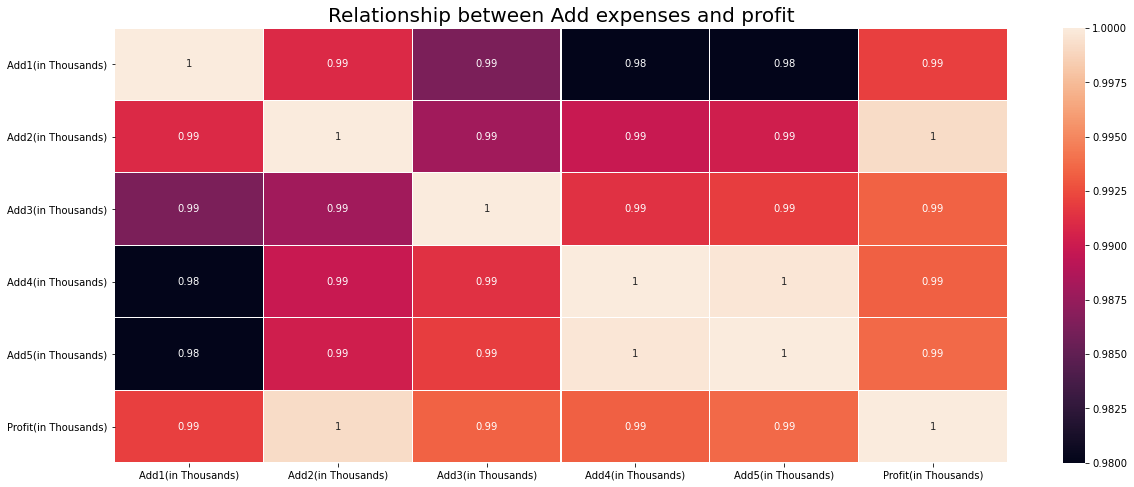

In [181]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.2)
plt.title('Relationship between Add expenses and profit',fontsize=20,y=1)

Text(-2, 1, 'Relationship between Add expenses and profit')

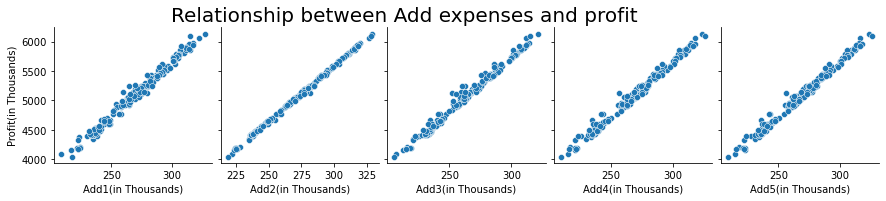

In [182]:

sns.pairplot(df,x_vars=['Add1(in Thousands)', 'Add2(in Thousands)','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],
y_vars=['Profit(in Thousands)'])
plt.title('Relationship between Add expenses and profit',fontsize=20,x=-2,y=1)

# Insights
    1.all adds are highly positively correlated to profit.
    1.Add 2 has a very stable value for correlation.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

Text(0.5, 1, 'Relationship between Add expenses and profit')

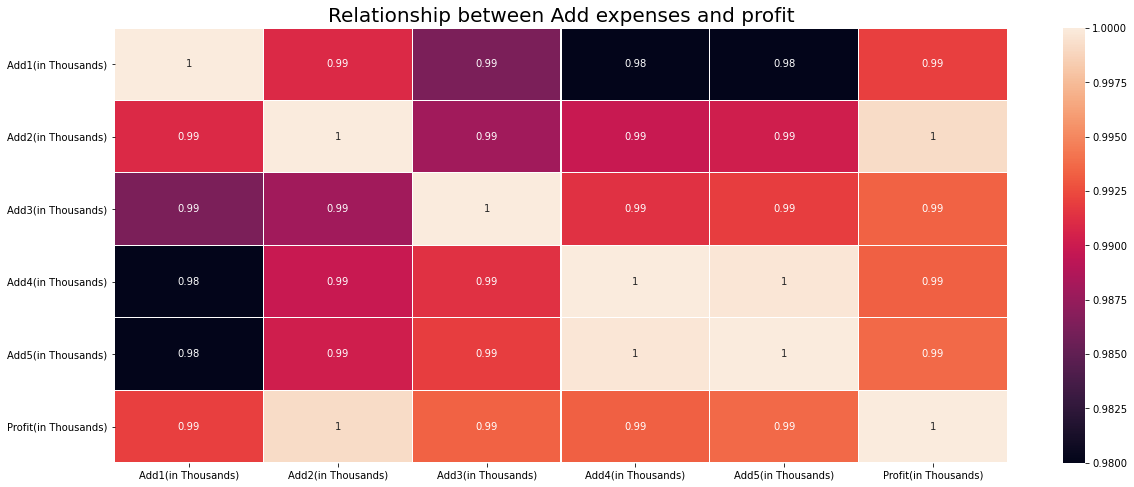

In [183]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.2)
plt.title('Relationship between Add expenses and profit',fontsize=20,y=1)

In [184]:
#Feature reduction

y=df['Profit(in Thousands)']
x=df.drop(['Date','Profit(in Thousands)'],axis=1)

In [185]:
x.shape

(205, 5)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [189]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [190]:
#Checking for accuracy for model using predictions and test values

#1)Mean Square Error
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 8.11273293080854e-25


In [191]:
#2)Coefficient of determination
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("Coefficient of determination is",r2)

Coefficient of determination is 1.0


# While feature reduction it is seen that all adds contribute to a lower MSE and Higher COD. Hence no adds are dropped while making the model.

# Insight
    1.MSE is very low indicating a very good model.
    2.coefficient of determination is 1 which indicates a perfect model.

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
    Add1(in Thousands) : 290
    Add2(in Thousands) : 312
    Add3(in Thousands) : 309
    Add4(in Thousands) : 298
    Add5(in Thousands) : 320

In [192]:
dict = {'Add1(in Thousands)':[290],
        'Add2(in Thousands)':[312],
        'Add3(in Thousands)':[309],
        'Add4(in Thousands)':[298],
        'Add5(in Thousands)':[320]}
  
df2 = pd.DataFrame(dict)
display(df2)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [244]:
#Prediction

predictions1=model.predict(df2)
print("According to model, the Profit(in thousands) for above ad budget =",predictions1)

According to model, the Profit(in thousands) for above ad budget = [5820.06]


# Insight
    The predicted value of the profit for the given budget is 5820.06